import kagglehub

# Download latest version
path = kagglehub.dataset_download("ranazak73/deshbhakt-youtube-channel-dataset")

print("Path to dataset files:", path)

#Output:
Path to dataset files: C:\Users\sarwa\.cache\kagglehub\datasets\ranazak73\deshbhakt-youtube-channel-dataset\versions\1
<class 'pandas.c

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("videos_data.csv")
df

,title,video_id,published_at,views,likes,comments,thumbnails,duration_sec,status,description
0,Has The AI Bubble Become Too Big? | Global Eco...,kMap2WrT164,2025-10-31T15:57:38Z,144956,8707,709,https://i.ytimg.com/vi/kMap2WrT164/default.jpg,1476,#video,🚨 Get exclusive NordVPN deal here ➵ https://N...
1,Who's The Winner? | As India Watches - Trump &...,M3YLE2ucpJs,2025-10-30T17:27:11Z,790084,24181,2040,https://i.ytimg.com/vi/M3YLE2ucpJs/default.jpg,1263,#video,🚨 Checkout Odoo and build your business!! http...
2,U thought #bulldozerjustice will stop at ‘them...,VhtZeHiA_0Q,2025-10-28T14:34:51Z,363807,22966,812,https://i.ytimg.com/vi/VhtZeHiA_0Q/default.jpg,127,#video,BJP cheerleader Vineet Agarwal is learning the...
3,Congress Surrendering Bihar To BJP? | Rahul Ga...,yUCpd7BJIdU,2025-10-27T16:48:58Z,1025126,29554,4773,https://i.ytimg.com/vi/yUCpd7BJIdU/default.jpg,1267,#video,Rahul Gandhi was last seen in Bihar on 1st of ...
4,French Colonial Loot Gets Robbed Again From Th...,Giasbnv5dLc,2025-10-23T18:01:11Z,1702085,35651,2077,https://i.ytimg.com/vi/Giasbnv5dLc/default.jpg,1088,#video,The daring daylight heist at the Louvre Museum...
...,...,...,...,...,...,...,...,...,...,...
643,The Kanhaiya Kumar Interview (Part1): Anti-Nat...,hqMjZ6g3PMQ,2018-09-24T12:46:19Z,1425180,73682,5331,https://i.ytimg.com/vi/hqMjZ6g3PMQ/default.jpg,1309,#video,Support #TheDeshBhakt & independent satire on ...
644,"Modi's 'Sacchi Mann Ki Baat' -18,000 Tweets ke...",1nc1wpj4RqY,2018-08-30T09:28:19Z,385086,32114,2337,https://i.ytimg.com/vi/1nc1wpj4RqY/default.jpg,544,#video,Like Political Satire / Appreciate Independent...
645,10 Years Of Namami Gange | Why Ganga Still Run...,LjLrz0JiUeg,2018-07-20T10:11:12Z,2052887,129071,13594,https://i.ytimg.com/vi/LjLrz0JiUeg/default.jpg,764,#video,Though the union government has pumped in almo...
646,Kissa Kursi Ka | India's finest political sati...,tPYcluI0INc,2018-06-30T06:21:38Z,456255,32752,2784,https://i.ytimg.com/vi/tPYcluI0INc/default.jpg,1010,#video,In the midst of the choking Emergency that Ind...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         648 non-null    object
 1   video_id      648 non-null    object
 2   published_at  648 non-null    object
 3   views         648 non-null    int64 
 4   likes         648 non-null    int64 
 5   comments      648 non-null    int64 
 6   thumbnails    648 non-null    object
 7   duration_sec  648 non-null    int64 
 8   status        648 non-null    object
 9   description   643 non-null    object
dtypes: int64(4), object(6)
memory usage: 50.8+ KB


In [4]:
df.describe()

,views,likes,comments,duration_sec
count,6.480000e+02,648.000000,648.000000,648.000000
mean,1.468255e+06,61201.217593,6129.447531,1407.336420
std,1.215275e+06,58402.492803,7179.572395,1238.138924
min,7.614100e+04,0.000000,0.000000,15.000000
25%,7.456110e+05,31862.500000,2499.250000,831.750000
50%,1.155944e+06,46169.500000,4289.000000,1114.000000
75%,1.811423e+06,71065.500000,7215.500000,1421.000000
max,1.468824e+07,797713.000000,86467.000000,7212.000000


In [5]:
df.isnull().sum()

title           0
video_id        0
published_at    0
views           0
likes           0
comments        0
thumbnails      0
duration_sec    0
status          0
description     5
dtype: int64

In [6]:
df.isnull()

,title,video_id,published_at,views,likes,comments,thumbnails,duration_sec,status,description
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
643,False,False,False,False,False,False,False,False,False,False
644,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False


In [7]:
df.columns

Index(['title', 'video_id', 'published_at', 'views', 'likes', 'comments',
       'thumbnails', 'duration_sec', 'status', 'description'],
      dtype='object')

In [8]:
df.drop(columns=['video_id'], axis = 1, inplace = True)
df

,title,published_at,views,likes,comments,thumbnails,duration_sec,status,description
0,Has The AI Bubble Become Too Big? | Global Eco...,2025-10-31T15:57:38Z,144956,8707,709,https://i.ytimg.com/vi/kMap2WrT164/default.jpg,1476,#video,🚨 Get exclusive NordVPN deal here ➵ https://N...
1,Who's The Winner? | As India Watches - Trump &...,2025-10-30T17:27:11Z,790084,24181,2040,https://i.ytimg.com/vi/M3YLE2ucpJs/default.jpg,1263,#video,🚨 Checkout Odoo and build your business!! http...
2,U thought #bulldozerjustice will stop at ‘them...,2025-10-28T14:34:51Z,363807,22966,812,https://i.ytimg.com/vi/VhtZeHiA_0Q/default.jpg,127,#video,BJP cheerleader Vineet Agarwal is learning the...
3,Congress Surrendering Bihar To BJP? | Rahul Ga...,2025-10-27T16:48:58Z,1025126,29554,4773,https://i.ytimg.com/vi/yUCpd7BJIdU/default.jpg,1267,#video,Rahul Gandhi was last seen in Bihar on 1st of ...
4,French Colonial Loot Gets Robbed Again From Th...,2025-10-23T18:01:11Z,1702085,35651,2077,https://i.ytimg.com/vi/Giasbnv5dLc/default.jpg,1088,#video,The daring daylight heist at the Louvre Museum...
...,...,...,...,...,...,...,...,...,...
643,The Kanhaiya Kumar Interview (Part1): Anti-Nat...,2018-09-24T12:46:19Z,1425180,73682,5331,https://i.ytimg.com/vi/hqMjZ6g3PMQ/default.jpg,1309,#video,Support #TheDeshBhakt & independent satire on ...
644,"Modi's 'Sacchi Mann Ki Baat' -18,000 Tweets ke...",2018-08-30T09:28:19Z,385086,32114,2337,https://i.ytimg.com/vi/1nc1wpj4RqY/default.jpg,544,#video,Like Political Satire / Appreciate Independent...
645,10 Years Of Namami Gange | Why Ganga Still Run...,2018-07-20T10:11:12Z,2052887,129071,13594,https://i.ytimg.com/vi/LjLrz0JiUeg/default.jpg,764,#video,Though the union government has pumped in almo...
646,Kissa Kursi Ka | India's finest political sati...,2018-06-30T06:21:38Z,456255,32752,2784,https://i.ytimg.com/vi/tPYcluI0INc/default.jpg,1010,#video,In the midst of the choking Emergency that Ind...


In [9]:
df["description"].fillna('No description', inplace = True) 
df

,title,published_at,views,likes,comments,thumbnails,duration_sec,status,description
0,Has The AI Bubble Become Too Big? | Global Eco...,2025-10-31T15:57:38Z,144956,8707,709,https://i.ytimg.com/vi/kMap2WrT164/default.jpg,1476,#video,🚨 Get exclusive NordVPN deal here ➵ https://N...
1,Who's The Winner? | As India Watches - Trump &...,2025-10-30T17:27:11Z,790084,24181,2040,https://i.ytimg.com/vi/M3YLE2ucpJs/default.jpg,1263,#video,🚨 Checkout Odoo and build your business!! http...
2,U thought #bulldozerjustice will stop at ‘them...,2025-10-28T14:34:51Z,363807,22966,812,https://i.ytimg.com/vi/VhtZeHiA_0Q/default.jpg,127,#video,BJP cheerleader Vineet Agarwal is learning the...
3,Congress Surrendering Bihar To BJP? | Rahul Ga...,2025-10-27T16:48:58Z,1025126,29554,4773,https://i.ytimg.com/vi/yUCpd7BJIdU/default.jpg,1267,#video,Rahul Gandhi was last seen in Bihar on 1st of ...
4,French Colonial Loot Gets Robbed Again From Th...,2025-10-23T18:01:11Z,1702085,35651,2077,https://i.ytimg.com/vi/Giasbnv5dLc/default.jpg,1088,#video,The daring daylight heist at the Louvre Museum...
...,...,...,...,...,...,...,...,...,...
643,The Kanhaiya Kumar Interview (Part1): Anti-Nat...,2018-09-24T12:46:19Z,1425180,73682,5331,https://i.ytimg.com/vi/hqMjZ6g3PMQ/default.jpg,1309,#video,Support #TheDeshBhakt & independent satire on ...
644,"Modi's 'Sacchi Mann Ki Baat' -18,000 Tweets ke...",2018-08-30T09:28:19Z,385086,32114,2337,https://i.ytimg.com/vi/1nc1wpj4RqY/default.jpg,544,#video,Like Political Satire / Appreciate Independent...
645,10 Years Of Namami Gange | Why Ganga Still Run...,2018-07-20T10:11:12Z,2052887,129071,13594,https://i.ytimg.com/vi/LjLrz0JiUeg/default.jpg,764,#video,Though the union government has pumped in almo...
646,Kissa Kursi Ka | India's finest political sati...,2018-06-30T06:21:38Z,456255,32752,2784,https://i.ytimg.com/vi/tPYcluI0INc/default.jpg,1010,#video,In the midst of the choking Emergency that Ind...


In [10]:
df.isnull().sum()

title           0
published_at    0
views           0
likes           0
comments        0
thumbnails      0
duration_sec    0
status          0
description     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

Feature engineering

In [12]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['status'] = df['status'].str.lstrip('#').astype('category') #df['status'] = df['status'].str.replace('#', '')

In [13]:
df['likes_per_view'] = df['likes'] / df['views']
df['comments_per_view'] = df['comments'] / df['views']
df['is_short'] = (df['duration_sec'] <= 60)  

In [14]:
df['publish_day'] = df['published_at'].dt.day
df['publish_month'] = df['published_at'].dt.month
df['publish_weekday'] = df['published_at'].dt.day_name() 

In [15]:
df.columns

Index(['title', 'published_at', 'views', 'likes', 'comments', 'thumbnails',
       'duration_sec', 'status', 'description', 'likes_per_view',
       'comments_per_view', 'is_short', 'publish_day', 'publish_month',
       'publish_weekday'],
      dtype='object')

In [16]:
df

,title,published_at,views,likes,comments,thumbnails,duration_sec,status,description,likes_per_view,comments_per_view,is_short,publish_day,publish_month,publish_weekday
0,Has The AI Bubble Become Too Big? | Global Eco...,2025-10-31 15:57:38+00:00,144956,8707,709,https://i.ytimg.com/vi/kMap2WrT164/default.jpg,1476,video,🚨 Get exclusive NordVPN deal here ➵ https://N...,0.060067,0.004891,False,31,10,Friday
1,Who's The Winner? | As India Watches - Trump &...,2025-10-30 17:27:11+00:00,790084,24181,2040,https://i.ytimg.com/vi/M3YLE2ucpJs/default.jpg,1263,video,🚨 Checkout Odoo and build your business!! http...,0.030606,0.002582,False,30,10,Thursday
2,U thought #bulldozerjustice will stop at ‘them...,2025-10-28 14:34:51+00:00,363807,22966,812,https://i.ytimg.com/vi/VhtZeHiA_0Q/default.jpg,127,video,BJP cheerleader Vineet Agarwal is learning the...,0.063127,0.002232,False,28,10,Tuesday
3,Congress Surrendering Bihar To BJP? | Rahul Ga...,2025-10-27 16:48:58+00:00,1025126,29554,4773,https://i.ytimg.com/vi/yUCpd7BJIdU/default.jpg,1267,video,Rahul Gandhi was last seen in Bihar on 1st of ...,0.028830,0.004656,False,27,10,Monday
4,French Colonial Loot Gets Robbed Again From Th...,2025-10-23 18:01:11+00:00,1702085,35651,2077,https://i.ytimg.com/vi/Giasbnv5dLc/default.jpg,1088,video,The daring daylight heist at the Louvre Museum...,0.020945,0.001220,False,23,10,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,The Kanhaiya Kumar Interview (Part1): Anti-Nat...,2018-09-24 12:46:19+00:00,1425180,73682,5331,https://i.ytimg.com/vi/hqMjZ6g3PMQ/default.jpg,1309,video,Support #TheDeshBhakt & independent satire on ...,0.051700,0.003741,False,24,9,Monday
644,"Modi's 'Sacchi Mann Ki Baat' -18,000 Tweets ke...",2018-08-30 09:28:19+00:00,385086,32114,2337,https://i.ytimg.com/vi/1nc1wpj4RqY/default.jpg,544,video,Like Political Satire / Appreciate Independent...,0.083394,0.006069,False,30,8,Thursday
645,10 Years Of Namami Gange | Why Ganga Still Run...,2018-07-20 10:11:12+00:00,2052887,129071,13594,https://i.ytimg.com/vi/LjLrz0JiUeg/default.jpg,764,video,Though the union government has pumped in almo...,0.062873,0.006622,False,20,7,Friday
646,Kissa Kursi Ka | India's finest political sati...,2018-06-30 06:21:38+00:00,456255,32752,2784,https://i.ytimg.com/vi/tPYcluI0INc/default.jpg,1010,video,In the midst of the choking Emergency that Ind...,0.071784,0.006102,False,30,6,Saturday


Target Variable Strategy

In [17]:
median_views = df['views'].median()
df['popular'] = (df['views'] > median_views).astype(int)

In [18]:
df

,title,published_at,views,likes,comments,thumbnails,duration_sec,status,description,likes_per_view,comments_per_view,is_short,publish_day,publish_month,publish_weekday,popular
0,Has The AI Bubble Become Too Big? | Global Eco...,2025-10-31 15:57:38+00:00,144956,8707,709,https://i.ytimg.com/vi/kMap2WrT164/default.jpg,1476,video,🚨 Get exclusive NordVPN deal here ➵ https://N...,0.060067,0.004891,False,31,10,Friday,0
1,Who's The Winner? | As India Watches - Trump &...,2025-10-30 17:27:11+00:00,790084,24181,2040,https://i.ytimg.com/vi/M3YLE2ucpJs/default.jpg,1263,video,🚨 Checkout Odoo and build your business!! http...,0.030606,0.002582,False,30,10,Thursday,0
2,U thought #bulldozerjustice will stop at ‘them...,2025-10-28 14:34:51+00:00,363807,22966,812,https://i.ytimg.com/vi/VhtZeHiA_0Q/default.jpg,127,video,BJP cheerleader Vineet Agarwal is learning the...,0.063127,0.002232,False,28,10,Tuesday,0
3,Congress Surrendering Bihar To BJP? | Rahul Ga...,2025-10-27 16:48:58+00:00,1025126,29554,4773,https://i.ytimg.com/vi/yUCpd7BJIdU/default.jpg,1267,video,Rahul Gandhi was last seen in Bihar on 1st of ...,0.028830,0.004656,False,27,10,Monday,0
4,French Colonial Loot Gets Robbed Again From Th...,2025-10-23 18:01:11+00:00,1702085,35651,2077,https://i.ytimg.com/vi/Giasbnv5dLc/default.jpg,1088,video,The daring daylight heist at the Louvre Museum...,0.020945,0.001220,False,23,10,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,The Kanhaiya Kumar Interview (Part1): Anti-Nat...,2018-09-24 12:46:19+00:00,1425180,73682,5331,https://i.ytimg.com/vi/hqMjZ6g3PMQ/default.jpg,1309,video,Support #TheDeshBhakt & independent satire on ...,0.051700,0.003741,False,24,9,Monday,1
644,"Modi's 'Sacchi Mann Ki Baat' -18,000 Tweets ke...",2018-08-30 09:28:19+00:00,385086,32114,2337,https://i.ytimg.com/vi/1nc1wpj4RqY/default.jpg,544,video,Like Political Satire / Appreciate Independent...,0.083394,0.006069,False,30,8,Thursday,0
645,10 Years Of Namami Gange | Why Ganga Still Run...,2018-07-20 10:11:12+00:00,2052887,129071,13594,https://i.ytimg.com/vi/LjLrz0JiUeg/default.jpg,764,video,Though the union government has pumped in almo...,0.062873,0.006622,False,20,7,Friday,1
646,Kissa Kursi Ka | India's finest political sati...,2018-06-30 06:21:38+00:00,456255,32752,2784,https://i.ytimg.com/vi/tPYcluI0INc/default.jpg,1010,video,In the midst of the choking Emergency that Ind...,0.071784,0.006102,False,30,6,Saturday,0


In [19]:
x = df[['likes', 'comments', 'views', 'is_short', 'publish_day', 'publish_month']]
y = df['popular']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
x

,likes,comments,views,is_short,publish_day,publish_month
0,8707,709,144956,False,31,10
1,24181,2040,790084,False,30,10
2,22966,812,363807,False,28,10
3,29554,4773,1025126,False,27,10
4,35651,2077,1702085,False,23,10
...,...,...,...,...,...,...
643,73682,5331,1425180,False,24,9
644,32114,2337,385086,False,30,8
645,129071,13594,2052887,False,20,7
646,32752,2784,456255,False,30,6


In [21]:
y

0      0
1      0
2      0
3      0
4      1
      ..
643    1
644    0
645    1
646    0
647    1
Name: popular, Length: 648, dtype: int64

In [22]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(518, 6) (130, 6) (518,) (130,)


Supervised Approach

In [23]:
model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
model.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [25]:
accuracy_score(y_test, y_pred)*100

99.23076923076923

In [26]:
confusion_matrix(y_test, y_pred)

array([[64,  1],
       [ 0, 65]])

In [27]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        65\n           1       0.98      1.00      0.99        65\n\n    accuracy                           0.99       130\n   macro avg       0.99      0.99      0.99       130\nweighted avg       0.99      0.99      0.99       130\n'

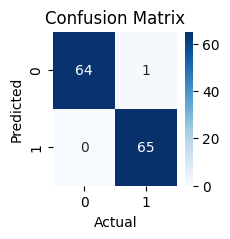

In [28]:
plt.figure(figsize=(2,2))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [29]:
with open("The Deshbhakt.pkl", "wb") as f:
    pickle.dump(model, f)

Unsupervised Approach

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(x)  # using the same X features above
df['cluster'] = cluster_labels